# DMW mini project : 
<img src="Images/db.jpg" width="100%">

In [1]:
# to supress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# for confusion matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

## Importing the dataset

In [2]:
df_pima=pd.read_csv('./Datasets/PimaIndiansDiabetes.csv')
df_pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesFunct,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Data Mininig and Analysis

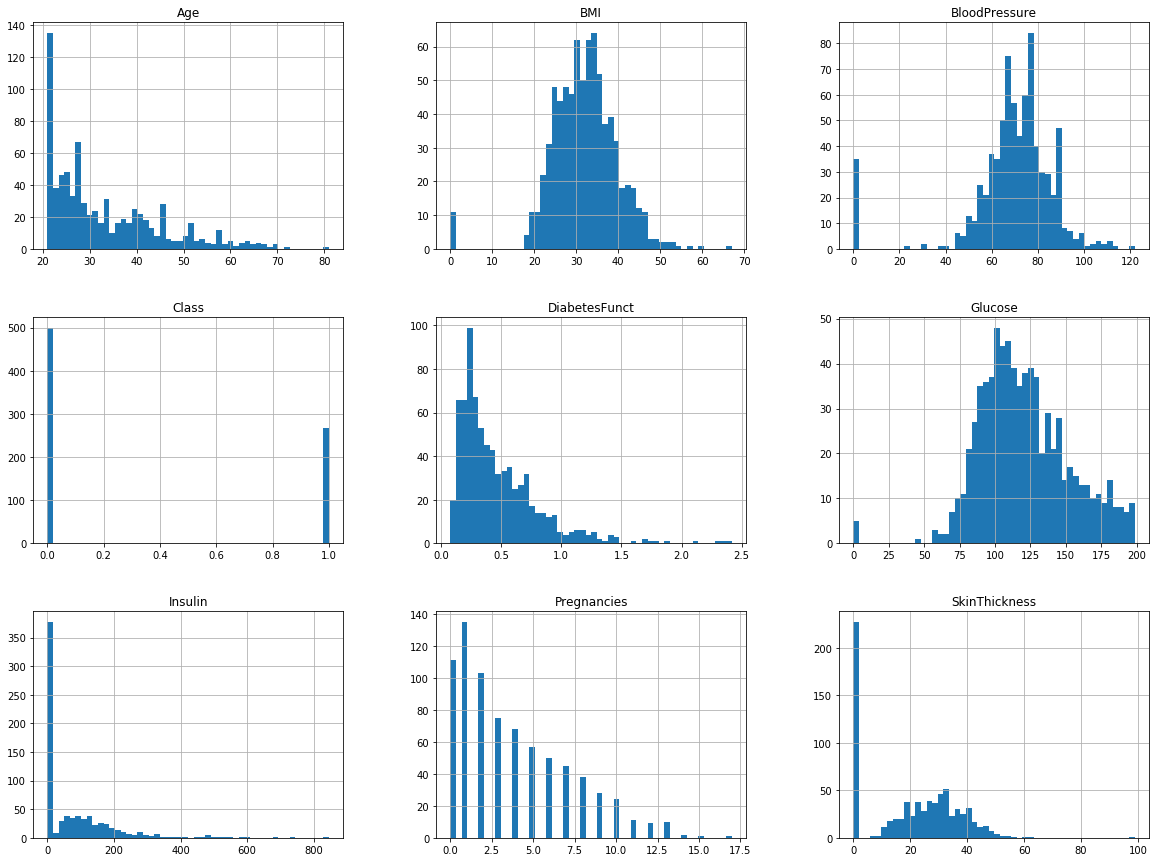

In [3]:
df_pima.hist(bins=50, figsize=(20, 15))
plt.show()

## Option One : Start Machine Learning on RAW Data 

### Selecting Features

In [ ]:
X = pd.DataFrame(data = df_pima, columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])

y = pd.DataFrame(data = df_pima, columns = ["Outcome"])

## Option Two : Perform Data Pre-processing 

In [ ]:
df_pima.isna().sum()

### Replacing 0's with NaNs

In [4]:
df_pima['Glucose'] = df_pima['Glucose'].replace(0, np.nan)
df_pima['BloodPressure'] = df_pima['BloodPressure'].replace(0, np.nan) 
df_pima['SkinThickness'] = df_pima['SkinThickness'].replace(0, np.nan) 
df_pima['Insulin'] = df_pima['Insulin'].replace(0, np.nan)        
df_pima['BMI'] = df_pima['BMI'].replace(0, np.nan) 
df_pima['DiabetesFunct'] = df_pima['DiabetesFunct'].replace(0, np.nan) # useless cuz DiabetesFuct=0 for no instance
df_pima['Age'] = df_pima['Age'].replace(0, np.nan)# useless cuz Age=0 for no instance

,Total,Percent
Insulin,374,0.486979
SkinThickness,227,0.295573
BloodPressure,35,0.045573
BMI,11,0.014323
Glucose,5,0.006510


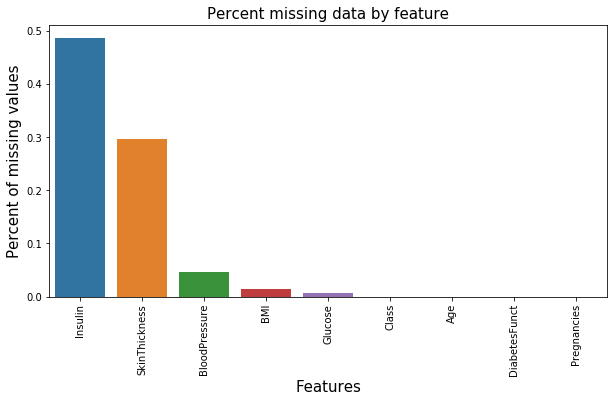

In [5]:
total = df_pima.isnull().sum().sort_values(ascending=False)
percent = (df_pima.isnull().sum()/df_pima.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(10, 5))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

### Replacing NaNs with mean value  

In [6]:
df_pima['Glucose'].fillna(df_pima['Glucose'].mean(), inplace=True)
df_pima['BloodPressure'].fillna(df_pima['BloodPressure'].mean(), inplace=True)
df_pima['SkinThickness'].fillna(df_pima['SkinThickness'].mean(), inplace=True)
df_pima['Insulin'].fillna(df_pima['Insulin'].mean(), inplace=True)
df_pima['BMI'].fillna(df_pima['BMI'].mean(), inplace=True)

# Option Three :  Feature Engineering

In [ ]:
# Determining correlation between features
corr = df_pima[df_pima.columns].corr()
sns.heatmap(corr, annot = True)

In [ ]:
# Feature selection
# No need to eliminate any features cuz correlation between any of them is not too much
PearsonThreshold = 0.9 #change the Pearson Coefficient threshold as required
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= PearsonThreshold: 
            if columns[j]:
                columns[j] = False
                
selected_columns = df_pima.columns[columns]
df_pima = df_pima[selected_columns]

### Selecting Features 

In [7]:
#X = pd.DataFrame(data = df_pima, columns = ["TimesPregnant","GlucoseConcentration","BloodPrs","SkinThickness","Serum","BMI","DiabetesFunct","Age"])
X = pd.DataFrame(data = df_pima, columns = ["Pregnancies","Glucose","SkinThickness","BMI","Age","Insulin","DiabetesFunct"])
y = pd.DataFrame(data = df_pima, columns = ["Class"])

# Option Four : Data Scaling 

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Split Data into Training & Testing

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

# Model building , finally !!

# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.1,penalty='l2')
model.fit(X_train,y_train)
acc_log_reg = model.score(X_test,y_test) *100
print(acc_log_reg)

81.16883116883116


In [11]:
actual = y_test
predict = model.predict(X_test)
result = confusion_matrix(actual , predict)
print('confusion matrix => \n',result)
print('\nAccuracy score => ',accuracy_score(actual , predict))
print('Classification report => \n',classification_report(actual,predict))

confusion matrix => 
 [[96 11]
 [18 29]]

Accuracy score =>  0.8116883116883117
Classification report => 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       107
           1       0.72      0.62      0.67        47

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154



# Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB
NBmodel = GaussianNB()
NBmodel.fit(X_train , y_train)
acc_NB = NBmodel.score(X_test,y_test) *100
print(acc_NB)

79.87012987012987


In [13]:
actual_naive = y_test
predict_naive = NBmodel.predict(X_test)
result_naive = confusion_matrix(actual_naive , predict_naive)
print('confusion matrix => \n',result_naive)
print('\nAccuracy score => ',accuracy_score(actual_naive , predict_naive))
print('Classification report => \n',classification_report(actual_naive,predict_naive))

confusion matrix => 
 [[94 13]
 [18 29]]

Accuracy score =>  0.7987012987012987
Classification report => 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       107
           1       0.69      0.62      0.65        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154



# Decision Trees 

In [14]:
from sklearn.tree import DecisionTreeClassifier
DTmodel = DecisionTreeClassifier(criterion='gini')
DTmodel.fit(X_train, y_train)
acc_DT = DTmodel.score(X_test,y_test) *100
print(acc_DT)

74.02597402597402


In [15]:
actual_DT = y_test
predict_DT = DTmodel.predict(X_test)
result_DT = confusion_matrix(actual_DT , predict_DT)
print('confusion matrix => \n',result_DT)
print('\nAccuracy score => ',accuracy_score(actual_DT , predict_DT))
print('Classification report => \n',classification_report(actual_DT,predict_DT))

confusion matrix => 
 [[86 21]
 [19 28]]

Accuracy score =>  0.7402597402597403
Classification report => 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       107
           1       0.57      0.60      0.58        47

    accuracy                           0.74       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.74      0.74      0.74       154



# Support Vector Machine  

In [16]:
from sklearn.svm import SVC
SVMmodel = SVC(C=0.3,kernel='rbf',gamma=0.43)
SVMmodel.fit(X_train , y_train)
acc_SVM = SVMmodel.score(X_test,y_test) *100
print(acc_SVM)

77.92207792207793


In [17]:
actual_svm = y_test
predict_svm = SVMmodel.predict(X_test)
result_svm = confusion_matrix(actual_svm , predict_svm)
print('confusion matrix => \n',result_svm)
print('\nAccuracy score => ',accuracy_score(actual_svm , predict_svm))
print('Classification report => \n',classification_report(actual_svm,predict_svm))

confusion matrix => 
 [[99  8]
 [26 21]]

Accuracy score =>  0.7792207792207793
Classification report => 
               precision    recall  f1-score   support

           0       0.79      0.93      0.85       107
           1       0.72      0.45      0.55        47

    accuracy                           0.78       154
   macro avg       0.76      0.69      0.70       154
weighted avg       0.77      0.78      0.76       154



# KNN Algorithm

In [18]:
from sklearn.neighbors import KNeighborsClassifier
KNNmodel = KNeighborsClassifier(n_neighbors=13,)
KNNmodel.fit(X_train , y_train)
acc_KNN = KNNmodel.score(X_test,y_test) *100
print(acc_KNN)

82.46753246753246


In [19]:
actual_knn = y_test
predict_knn = KNNmodel.predict(X_test)
result_knn = confusion_matrix(actual_knn , predict_knn)
print('confusion matrix => \n',result_knn)
print('\nAccuracy score => ',accuracy_score(actual_knn , predict_knn))
print('Classification report => \n',classification_report(actual_knn,predict_knn))

confusion matrix => 
 [[95 12]
 [15 32]]

Accuracy score =>  0.8246753246753247
Classification report => 
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       107
           1       0.73      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154



## Which model is the best ?

In [20]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes','Decision Tree' ,
              'Support Vector Machine', 'K Nearest Neighbour'],
    'Score': [acc_log_reg, acc_NB, 
              acc_DT, acc_SVM , acc_KNN]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
82.467532,K Nearest Neighbour
81.168831,Logistic Regression
79.870130,Naive Bayes
77.922078,Support Vector Machine
74.025974,Decision Tree
